Data Source-https://www.kaggle.com/shubham2003/indian-actors-face-recognition

steps-
    1. Getting libraries
    2. Renaming the filenames and save to one place
    3. Save filename with their corresponding label in pandas

### 1. Getting libraries

In [133]:
import cv2
import pandas as pd
import os

### 2. Renaming the filenames and save to one place

since every individual actor's picture are in separate folders.We have to save it at one place and rename with respect to their original name.

In [116]:
def rename(path,name): #funtion for remaning file and save to local path
    i=1
    for filename in os.listdir(path):
        src =path+filename
        dst = name+'_'+ str(i) + ".jpg"
        os.rename(src, dst)
        i+=1

In [117]:
rename('indian-actors-face-recognition/train_images/train_images/AIR/','train_aishwarya')
rename('indian-actors-face-recognition/train_images/train_images/ALB/','train_alia')
rename('indian-actors-face-recognition/train_images/train_images/SLK/','train_salman')
rename('indian-actors-face-recognition/train_images/train_images/AMB/','train_amitabh')
rename('indian-actors-face-recognition/train_images/train_images/SRK/','train_shahrukh')

In [118]:
rename('indian-actors-face-recognition/test_images/test_images/AIR/','test_aishwarya')
rename('indian-actors-face-recognition/test_images/test_images/ALB/','test_alia')
rename('indian-actors-face-recognition/test_images/test_images/AMB/','test_amitabh')
rename('indian-actors-face-recognition/test_images/test_images/SLK/','test_salman')
rename('indian-actors-face-recognition/test_images/test_images/SRK/','test_shahrukh')

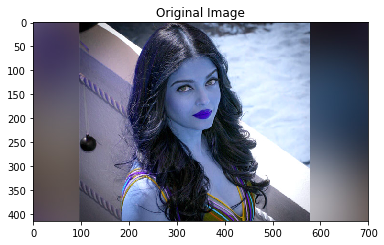

In [120]:
img_1 = cv2.imread('train_aishwarya30.jpg')
plt.title('Original Image')
plt.imshow(img_1)

### 3. Save filename with their corresponding label in pandas

In [131]:
jpg_files=[i for i in files if i.endswith('.jpg')] #All jpg file list
jpg_files

In [166]:
df = pd.DataFrame({'file_name':jpg_files}) #file into pandas dataframe
df.head(5)

,file_name
0,test_aishwarya1.jpg
1,test_aishwarya2.jpg
2,test_aishwarya3.jpg
3,test_aishwarya4.jpg
4,test_alia1.jpg


In [207]:
col_name=['train','test','aishwarya','alia','amitabh','salman','shahrukh']
for col in col_name:             #labeling for all files
    df[col]=df.file_name.str.contains(col)             
    df[col]=df[col].astype('category')
    df[col]=df[col].replace(True,1)
    df[col]=df[col].replace(False,0)

In [208]:
df.head(5)

,file_name,train,test,aishwarya,alia,amitabh,salman,shahrukh
0,test_aishwarya1.jpg,0,1,1,0,0,0,0
1,test_aishwarya2.jpg,0,1,1,0,0,0,0
2,test_aishwarya3.jpg,0,1,1,0,0,0,0
3,test_aishwarya4.jpg,0,1,1,0,0,0,0
4,test_alia1.jpg,0,1,0,1,0,0,0


In [211]:
df.to_csv('label.csv') #saving the file